# PYBER

![title](Ride.png)

This report offers some data-backed guidance on new opportunities for market differentiation to Pyber,a ride-sharing startup.
The data used in this report is the company's complete recordset of rides containing information about every active driver and historic ride,
including details like city, driver count, individual fares, and city type.

----

### Analysis

---

* Urban areas have the largest number of rides followed by Suburban and Rural areas.

* Urban Areas also have many more drivers as compared to other areas. Over 85% of the drivers work in the Urban areas.

Average per driver fares by city type:
    
* Overall the drivers made between 0.3 to 42.26 dollars in fares with an average of 4.60 dollars
* Urban drivers made between 0.3 and 7.67 dollars in fares with an average of 1.22 dollars
* Suburban drivers made between 1.10 and 33.96 dollars in fares with an average of 5.15 dollars
* Rural drivers made between 3.30 and 42.26 dollars in fares with an average of 15.88 dollars



 These numbers could be used to encourage more drivers to work in the rural and suburban areas.

One another note, it may be useful to check for any loss in revenue due to un-fulfilled ride requests in the rural and suburban areas because of the shortage of drivers. 



In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on="city")

pyber_df["av fare/driver"] = pyber_df["fare"]/pyber_df["driver_count"]
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type,av fare/driver
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,2.766000
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,0.420000
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,0.586667
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,0.689412
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,0.751739


## Bubble Plot of Ride Sharing Data

#### Obtain the x and y coordinates for each of the three city types

In [2]:
gpby_city_and_type = pyber_df.groupby(['city','type'])
cityType_df = pd.DataFrame(gpby_city_and_type["city"].count())
cityType_df = cityType_df.rename(columns={"city":"Total Number of Rides (Per City)"})
cityType_df["Average Fare ($)"] = gpby_city_and_type["fare"].mean().round(2)
cityType_df["Average Fare Per Driver($)"] = gpby_city_and_type["av fare/driver"].mean().round(2)
cityType_df["Driver Count per City"] = gpby_city_and_type["driver_count"].sum()
cityType_df = cityType_df.reset_index()
cityType_df.head()


,city,type,Total Number of Rides (Per City),Average Fare ($),Average Fare Per Driver($),Driver Count per City
0,Amandaburgh,Urban,18,24.64,2.05,216
1,Barajasview,Urban,22,25.33,0.97,572
2,Barronchester,Suburban,16,36.42,3.31,176
3,Bethanyland,Suburban,18,32.96,1.50,396
4,Bradshawfurt,Rural,10,40.06,5.72,70


In [3]:
cityType_df.describe()

,Total Number of Rides (Per City),Average Fare ($),Average Fare Per Driver($),Driver Count per City
count,120.000000,120.00000,120.000000,120.000000
mean,19.791667,27.89100,4.596167,572.575000
std,7.878165,4.94443,8.485927,563.201498
min,3.000000,20.09000,0.300000,4.000000
25%,14.750000,24.08500,0.637500,117.500000
50%,20.000000,26.75000,1.390000,374.000000
75%,25.000000,30.95250,3.952500,940.250000
max,39.000000,43.28000,42.260000,2277.000000


* Overall the drivers made between 0.3 to 42.26 dollars in fares with an average of 4.60 dollars

In [4]:
cityType_df[cityType_df["type"]=="Urban"].describe()

,Total Number of Rides (Per City),Average Fare ($),Average Fare Per Driver($),Driver Count per City
count,66.000000,66.000000,66.000000,66.000000
mean,24.621212,24.498939,1.216212,903.060606
std,5.408726,2.190288,1.457054,558.958947
min,12.000000,20.090000,0.300000,66.000000
25%,21.000000,22.797500,0.492500,445.500000
50%,24.000000,24.475000,0.700000,894.000000
75%,28.000000,25.965000,1.187500,1231.500000
max,39.000000,28.990000,7.670000,2277.000000


* Urban drivers made between 0.3 and 7.67 dollars in fares with an average of 1.22 dollars

In [5]:
cityType_df[cityType_df["type"]=="Suburban"].describe()

,Total Number of Rides (Per City),Average Fare ($),Average Fare Per Driver($),Driver Count per City
count,36.000000,36.000000,36.000000,36.000000
mean,17.361111,30.736667,5.151667,238.055556
std,4.323707,2.661795,7.041314,159.429688
min,9.000000,24.700000,1.100000,14.000000
25%,14.000000,29.472500,1.490000,103.750000
50%,17.000000,30.900000,1.970000,245.000000
75%,19.250000,31.985000,4.895000,345.250000
max,27.000000,36.420000,33.960000,675.000000


* Suburban drivers made between 1.10 and 33.96 dollars in fares with an average of 5.15 dollars

In [6]:
cityType_df[cityType_df["type"]=="Rural"].describe()

,Total Number of Rides (Per City),Average Fare ($),Average Fare Per Driver($),Driver Count per City
count,18.000000,18.000000,18.000000,18.000000
mean,6.944444,34.637222,15.878333,29.833333
std,2.508157,5.309819,14.632224,23.124344
min,3.000000,24.120000,3.300000,4.000000
25%,5.250000,31.467500,5.307500,9.000000
50%,6.000000,35.125000,8.420000,24.000000
75%,8.750000,36.602500,28.510000,42.750000
max,12.000000,43.280000,42.260000,72.000000


* Rural drivers made between 3.30 and 42.26 dollars in fares with an average of 15.88 dollars

In [7]:
urban_x = cityType_df["Total Number of Rides (Per City)"][cityType_df["type"]=="Urban"].tolist()
urban_y = cityType_df["Average Fare ($)"][cityType_df["type"]=="Urban"].tolist()
urban_s = cityType_df["Driver Count per City"][cityType_df["type"]=="Urban"].tolist()

suburban_x = cityType_df["Total Number of Rides (Per City)"][cityType_df["type"]=="Suburban"].tolist()
suburban_y = cityType_df["Average Fare ($)"][cityType_df["type"]=="Suburban"].tolist()
suburban_s = cityType_df["Driver Count per City"][cityType_df["type"]=="Suburban"].tolist()

rural_x = cityType_df["Total Number of Rides (Per City)"][cityType_df["type"]=="Rural"].tolist()
rural_y = cityType_df["Average Fare ($)"][cityType_df["type"]=="Rural"].tolist()
rural_s = cityType_df["Driver Count per City"][cityType_df["type"]=="Rural"].tolist()


#### Build the scatter plots for each city types

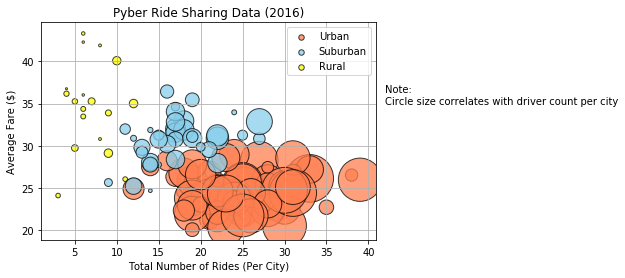

In [8]:
plt.scatter(urban_x, urban_y, s=urban_s,  label='Urban', alpha=0.75, facecolors="coral", edgecolors="black")
plt.scatter(suburban_x, suburban_y, s=suburban_s,  label='Suburban', alpha=0.75, facecolors="skyblue", edgecolors="black")
plt.scatter(rural_x, rural_y, s=rural_s,  label='Rural', alpha=0.75, facecolors="yellow", edgecolors="black")

#### Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

#### Create a legend
lgnd = plt.legend(loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.grid(True)

#### Incorporate a text label regarding circle size
plt.text(42,36, 'Note:\nCircle size correlates with driver count per city',
         horizontalalignment='left',
         verticalalignment='center')

#### Save Figure
plt.savefig("Images/RideSharingData.png")

#### Show plot
plt.show()

# experiment with effects like `alpha`, `edgecolor`, and `linewidths`.


# Another Bubble Plot of Ride Sharing Data

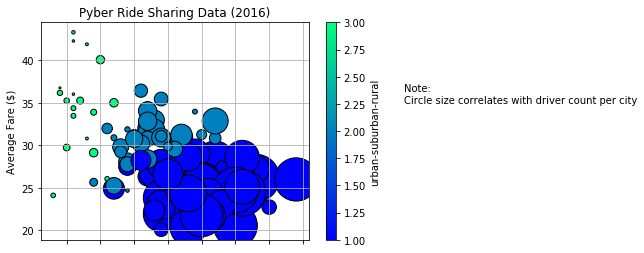

In [9]:
typeDict =  {"Urban":1, "Suburban":2, "Rural":3 }
cityType_df["urban-suburban-rural"] = [typeDict[item] for item in cityType_df["type"]] 
cityType_df.head()
cityType_df.plot.scatter(x="Total Number of Rides (Per City)",
                          y="Average Fare ($)",
                          c="urban-suburban-rural",
                          colormap='winter', 
                          edgecolor='black',
                          s=cityType_df["Driver Count per City"].tolist(),
                          title="Pyber Ride Sharing Data (2016)",
                          grid=True)

# Incorporate the other graph properties
plt.text(55,36, 'Note:\nCircle size correlates with driver count per city',
         horizontalalignment='left',
         verticalalignment='center')
plt.xlabel("Total Number of Rides (Per City)")

plt.show()

# experiment with effects like `alpha`, `edgecolor`, and `linewidths`.

# why does the xlabel not show?

## Total Fares by City Type

In [10]:
gpby_type = pyber_df.groupby('type')
cityTypeFares_df = pd.DataFrame(gpby_type["fare"].sum())

# Calculate Type Percents
cityTypeFares_df["%fare"] = 100 * cityTypeFares_df['fare'] / cityTypeFares_df['fare'].sum()
cityTypeFares_df

,fare,%fare
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


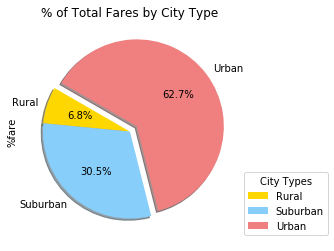

In [11]:
# Build Pie Chart
cityTypeFares_df.plot.pie("%fare",
                     explode=[0,0,0.1],
                     colors=['gold','lightskyblue','lightcoral'],
                     autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

plt.legend(title="City Types",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.grid(True)

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")

# Show Figure
plt.show()



## Total Rides by City Type

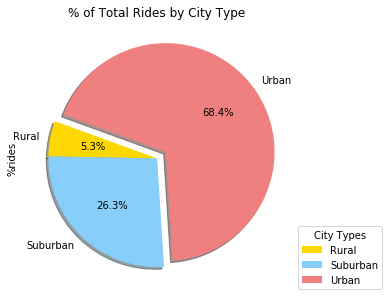

In [12]:
# Calculate Ride Percents
cityTypeRides_df = pd.DataFrame(gpby_type["city"].count())
cityTypeRides_df = cityTypeRides_df.rename(columns={"city":"rides"})

# Calculate Type Percents
cityTypeRides_df["%rides"] = 100 * cityTypeRides_df['rides'] / cityTypeRides_df['rides'].sum()

cityTypeRides_df.plot.pie("%rides", figsize=(10, 5),
                     explode=(0,0,0.1), 
                     colors=('gold','lightskyblue','lightcoral'),
                     autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Rides by City Type")

plt.legend(title="City Types",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.grid(True)


# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")

# Show Figure
plt.show()


## Total Drivers by City Type

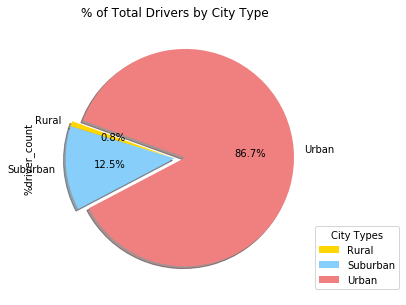

In [13]:
# Calculate Driver Percents
total_drivers = pyber_df["driver_count"].sum()

cityTypeDrivers_df = pd.DataFrame(gpby_type["driver_count"].sum())

cityTypeDrivers_df["%driver_count"] = 100 * cityTypeDrivers_df['driver_count'] / total_drivers

cityTypeDrivers_df.plot.pie("%driver_count", figsize=(5, 5),
                     explode=(0,0,0.1),
                     colors=('gold','lightskyblue','lightcoral'),
                     autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Drivers by City Type")

plt.legend(title="City Types",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.grid(True)


# Save Figure
plt.savefig("Images/TotalDriversbyCityType.png")

# Show Figure
plt.show()


In [14]:
cityTypeDrivers_df

,driver_count,%driver_count
type,,
Rural,537,0.781557
Suburban,8570,12.472893
Urban,59602,86.745550


Verify the numbers from the original data frame:

In [15]:
urban_drivers = pyber_df["driver_count"][pyber_df["type"]=="Urban"].sum()
suburban_drivers = pyber_df["driver_count"][pyber_df["type"]=="Suburban"].sum()
rural_drivers = pyber_df["driver_count"][pyber_df["type"]=="Rural"].sum()
"{}, {}, {}, {}".format(urban_drivers, suburban_drivers, rural_drivers, total_drivers)

'59602, 8570, 537, 68709'

In [16]:
"{:0.2f}%, {:0.2f}%, {:0.2f}%".format(100*urban_drivers/total_drivers, 100*suburban_drivers/total_drivers, \
                        100*rural_drivers/total_drivers)

'86.75%, 12.47%, 0.78%'